# Ciência e Visualização de Dados em Saúde

## Um estudo de doenças cardíacas utilizando Machine Learning

### Motivação

- Explorar os benefícios que a Inteligência artificial pode trazer para a área da saúde.
- Quanto mais cedo um problema cardíaco for identificado, mais eficaz será o tratamento e consequentemente menor o risco de óbito.

### Objetivo

Tentar fazer uma previsão da presença ou não de doença cardiovascular em uma pessoa, baseado em algumas caracteristicas físicas e exames, utilizando machine learning.

### Dataset

(https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)


##### Features:

- Age | Objective Feature | age | int (days) 
- Height | Objective Feature | height | int (cm) 
- Weight | Objective Feature | weight | float (kg) 
- Gender | Objective Feature | gender | categorical code 
- Systolic blood pressure | Examination Feature | ap_hi | int 
- Diastolic blood pressure | Examination Feature | ap_lo | int 
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal 
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal 
- Smoking | Subjective Feature | smoke | binary 
- Alcohol intake | Subjective Feature | alco | binary 
- Physical activity | Subjective Feature | active | binary 
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary 

#### Processamento dos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df=pd.read_csv("cardio_train.csv", sep = ';')

In [2]:
# df

In [3]:
# df.describe()

In [4]:
# df.info()

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {df_train.shape[0]}")
print(f"No. of validation examples: {df_val.shape[0]}")

No. of training examples: 56000
No. of validation examples: 14000


#### Relação entre as features

<Axes: >

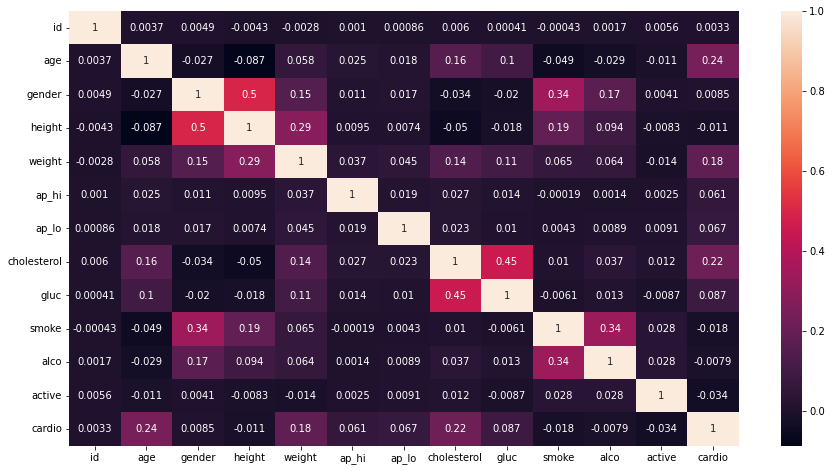

In [6]:
matrix = df_train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()


x = df_train.drop(['id','cardio'], axis = 1)
x = scaler_X.fit_transform(x)
y = df_train['cardio']

x_val = df_val.drop(['id','cardio'], axis = 1)
x_val = scaler_X.fit_transform(x_val)
y_val = df_val['cardio']

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

print(f"No. of training examples: {x_train.shape[0]}")
print(f"No. of testing examples: {x_test.shape[0]}")

No. of training examples: 44800
No. of testing examples: 11200


In [9]:
# x_train

### Modelagem
#### Modelos utilizados na análise
- Logistic regression
- Random forest
- K-Nearest Neighbour

#### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred_reg = reg.predict(x_test)

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5653
           1       0.73      0.68      0.70      5547

    accuracy                           0.72     11200
   macro avg       0.72      0.72      0.72     11200
weighted avg       0.72      0.72      0.72     11200



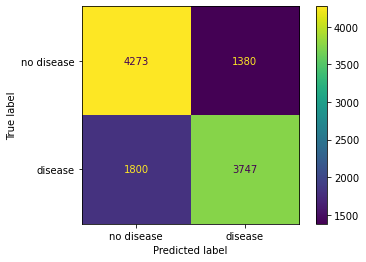

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_reg, display_labels=['no disease', 'disease'])
print(classification_report(y_test, y_pred_reg))

#### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      5653
           1       0.72      0.70      0.71      5547

    accuracy                           0.71     11200
   macro avg       0.71      0.71      0.71     11200
weighted avg       0.71      0.71      0.71     11200



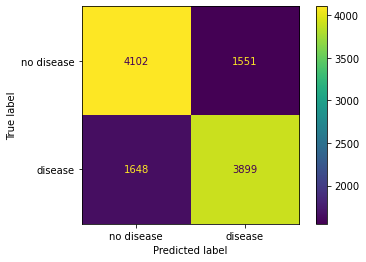

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc, display_labels=['no disease', 'disease'])
print(classification_report(y_test, y_pred_rfc))

####  K-Nearest Neighbour

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

              precision    recall  f1-score   support

           0       0.65      0.66      0.66      5653
           1       0.65      0.63      0.64      5547

    accuracy                           0.65     11200
   macro avg       0.65      0.65      0.65     11200
weighted avg       0.65      0.65      0.65     11200



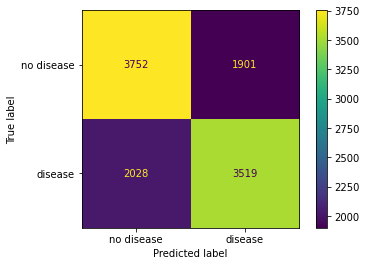

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=['no disease', 'disease'])
print(classification_report(y_test, y_pred_knn))

### Predição final

Com um conjunto de dados separados, vamos testar o modelo utilizando o melhor modelo(random forest)

In [16]:
y_pred_val = rfc.predict(x_val)

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      6987
           1       0.73      0.63      0.68      7013

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



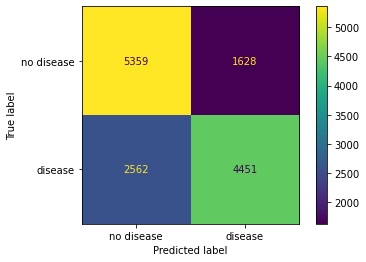

In [17]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, display_labels=['no disease', 'disease'])
print(classification_report(y_val, y_pred_val))

### Conclusão

O melhor modelo apresentado foi o Random Forest. Este modelo mostrou uma acurácia de 71% no treinamento e foi o que apresentou o menor número de falso negativos.

Na predição final, utilizando novos dados - total de 14 mil pessoas, o modelo previu corretamente que 5359 pessoas não tinham doenças cardiovasculares e 4451 tinham doenças cardiovasculares, mas previu de forma incorreta 2562 pessoas com falsos negativos e 1628 pessoas com falsos positivos.

Observando o gráfico de correlação entre as features é possível observar que as caracteríticas idade, peso e colesterol são as que tem uma maior correlação com a presença ou não de doença cardiovascular.